In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import altair as alt

In [3]:
mobility_report = pd.read_csv('Global_Mobility_Report.csv')
mobility_report.date = mobility_report.date.astype('datetime64[ns]')
mobility_report.head()

C:\Users\colot\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


## Split Dataframe by country_region_code

In [4]:
country_region_code = mobility_report["country_region_code"].unique()
country_region_code = country_region_code.tolist()
country_region_code

['AE',
 'AF',
 'AG',
 'AO',
 'AR',
 'AT',
 'AU',
 'AW',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BJ',
 'BO',
 'BR',
 'BS',
 'BW',
 'BY',
 'BZ',
 'CA',
 'CH',
 'CI',
 'CL',
 'CM',
 'CO',
 'CR',
 'CV',
 'CZ',
 'DE',
 'DK',
 'DO',
 'EC',
 'EE',
 'EG',
 'ES',
 'FI',
 'FJ',
 'FR',
 'GA',
 'GB',
 'GE',
 'GH',
 'GR',
 'GT',
 'GW',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KR',
 'KW',
 'KZ',
 'LA',
 'LB',
 'LI',
 'LK',
 'LT',
 'LU',
 'LV',
 'LY',
 'MD',
 'MK',
 'ML',
 'MM',
 'MN',
 'MT',
 'MU',
 'MX',
 'MY',
 'MZ',
 nan,
 'NE',
 'NG',
 'NI',
 'NL',
 'NO',
 'NP',
 'NZ',
 'OM',
 'PA',
 'PE',
 'PG',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'PY',
 'QA',
 'RE',
 'RO',
 'RS',
 'RW',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'SN',
 'SV',
 'TG',
 'TH',
 'TJ',
 'TR',
 'TT',
 'TW',
 'TZ',
 'UG',
 'US',
 'UY',
 'VE',
 'VN',
 'YE',
 'ZA',
 'ZM',
 'ZW']

In [5]:
grouped = mobility_report.groupby(mobility_report.country_region_code)

In [6]:
AE = grouped.get_group("AE")
AF = grouped.get_group("AF")
AG = grouped.get_group("AG")

In [7]:
country_region_code[1]

'AF'

## Data Viz for AE 
Splitting AE up again into subregions

In [8]:
# Gonna be honest this was from Tim
AbuDhabi = AE[AE.sub_region_1 == "Abu Dhabi"]
Ajman = AE[AE.sub_region_1 == "Ajman"]
Dubai = AE[AE.sub_region_1 == "Dubai"]
Fujairah = AE[AE.sub_region_1 == "Fujairah"]
RasalKhaimah = AE[AE.sub_region_1 == "Ras al Khaimah"]
Sharjah = AE[AE.sub_region_1 == "Sharjah"]
UmmAlQuawain =  AE[AE.sub_region_1 == "Umm Al Quawain"]
subregions = [AbuDhabi, Ajman, Dubai, Fujairah, RasalKhaimah, Sharjah, UmmAlQuawain]
subregions_names = ["Abu Dhabi", "Ajman", "Dubai", "Fujairah", "Ras al Khaimah", "Sharjah", "Umm Al Quawain"]

C:\Users\colot\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


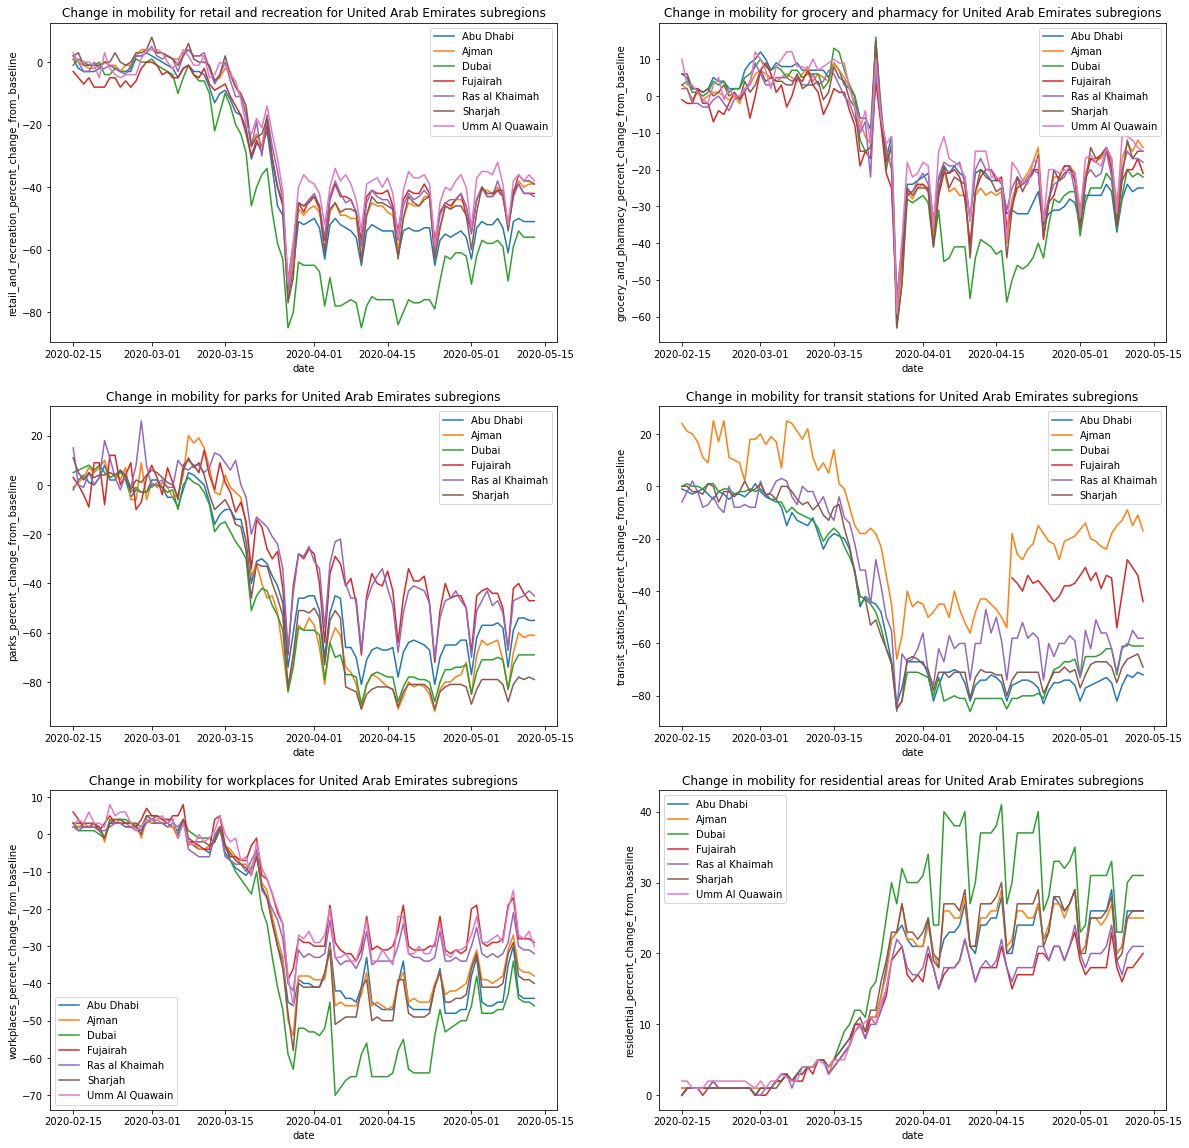

In [9]:
# Note y-axis is not consistent, some data is missing as well
f, axes = plt.subplots(3, 2, figsize = (20, 20))
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "retail_and_recreation_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[0][0])
    ax.set_title("Change in mobility for retail and recreation for United Arab Emirates subregions")
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "grocery_and_pharmacy_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[0][1])
    ax.set_title("Change in mobility for grocery and pharmacy for United Arab Emirates subregions")
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "parks_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[1][0])
    ax.set_title("Change in mobility for parks for United Arab Emirates subregions")
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "transit_stations_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[1][1])
    ax.set_title("Change in mobility for transit stations for United Arab Emirates subregions")
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "workplaces_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[2][0])
    ax.set_title("Change in mobility for workplaces for United Arab Emirates subregions")
for i in range(len(subregions)):
    ax = sb.lineplot(x = 'date', y = "residential_percent_change_from_baseline", data = subregions[i], label = subregions_names[i], legend = 'full', ax = axes[2][1])
    ax.set_title("Change in mobility for residential areas for United Arab Emirates subregions")


"UAE: Three-day lockdown scheduled March 26-29" 
Source: https://www.garda.com/crisis24/news-alerts/326651/uae-three-day-lockdown-scheduled-march-26-29-update-16

"The United Arab Emirates (UAE) – a federation of seven emirates consisting of capital Abu Dhabi, Ajman, Dubai, Fujairah, Ras Al Khaimah, Sharjah and Umm Al Quwain – announced a two-week lockdown on April 5 to contain the COVID-19 pandemic and announced there will be disinfection drives. "
Source: https://www.outlookindia.com/outlooktraveller/travelnews/story/70181/uae-begins-24-hour-lockdown-for-two-weeks-from-april-5-to-contain-the-covid-19

## Data Viz for AF

In [10]:
AF

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
712,AF,Afghanistan,NaN,NaN,2020-02-15,-9.0,-10.0,0.0,-2.0,-28.0,5.0
713,AF,Afghanistan,NaN,NaN,2020-02-16,3.0,11.0,1.0,10.0,4.0,0.0
714,AF,Afghanistan,NaN,NaN,2020-02-17,6.0,11.0,2.0,9.0,5.0,-1.0
715,AF,Afghanistan,NaN,NaN,2020-02-18,3.0,5.0,3.0,9.0,6.0,-1.0
716,AF,Afghanistan,NaN,NaN,2020-02-19,-1.0,3.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
796,AF,Afghanistan,NaN,NaN,2020-05-09,-40.0,-17.0,-20.0,-41.0,-30.0,12.0
797,AF,Afghanistan,NaN,NaN,2020-05-10,-40.0,-21.0,-24.0,-43.0,-34.0,14.0
798,AF,Afghanistan,NaN,NaN,2020-05-11,-38.0,-11.0,-19.0,-43.0,-31.0,12.0
799,AF,Afghanistan,NaN,NaN,2020-05-12,-38.0,-14.0,-19.0,-41.0,-32.0,13.0


Text(0.5, 1.0, 'Change in mobility for residential areas for Afghanistan')

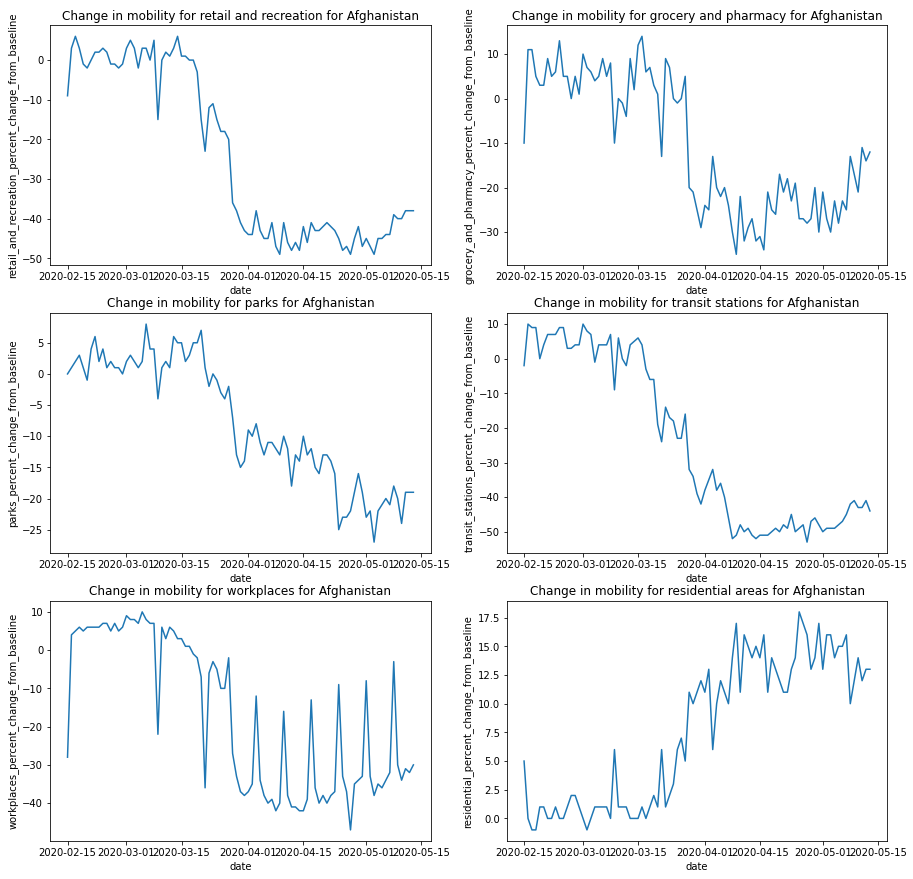

In [11]:
f, axes = plt.subplots(3, 2, figsize = (15, 15))
ax = sb.lineplot(x = 'date', y = "retail_and_recreation_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[0][0])
ax.set_title("Change in mobility for retail and recreation for Afghanistan")
ax = sb.lineplot(x = 'date', y = "grocery_and_pharmacy_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[0][1])
ax.set_title("Change in mobility for grocery and pharmacy for Afghanistan")
ax = sb.lineplot(x = 'date', y = "parks_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[1][0])
ax.set_title("Change in mobility for parks for Afghanistan")
ax = sb.lineplot(x = 'date', y = "transit_stations_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[1][1])
ax.set_title("Change in mobility for transit stations for Afghanistan")
ax = sb.lineplot(x = 'date', y = "workplaces_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[2][0])
ax.set_title("Change in mobility for workplaces for Afghanistan")
ax = sb.lineplot(x = 'date', y = "residential_percent_change_from_baseline", data = AF, legend = 'full', ax = axes[2][1])
ax.set_title("Change in mobility for residential areas for Afghanistan")


## Data Viz for AG

Text(0.5, 1.0, 'Change in mobility for residential areas for Antigua and Barbuda')

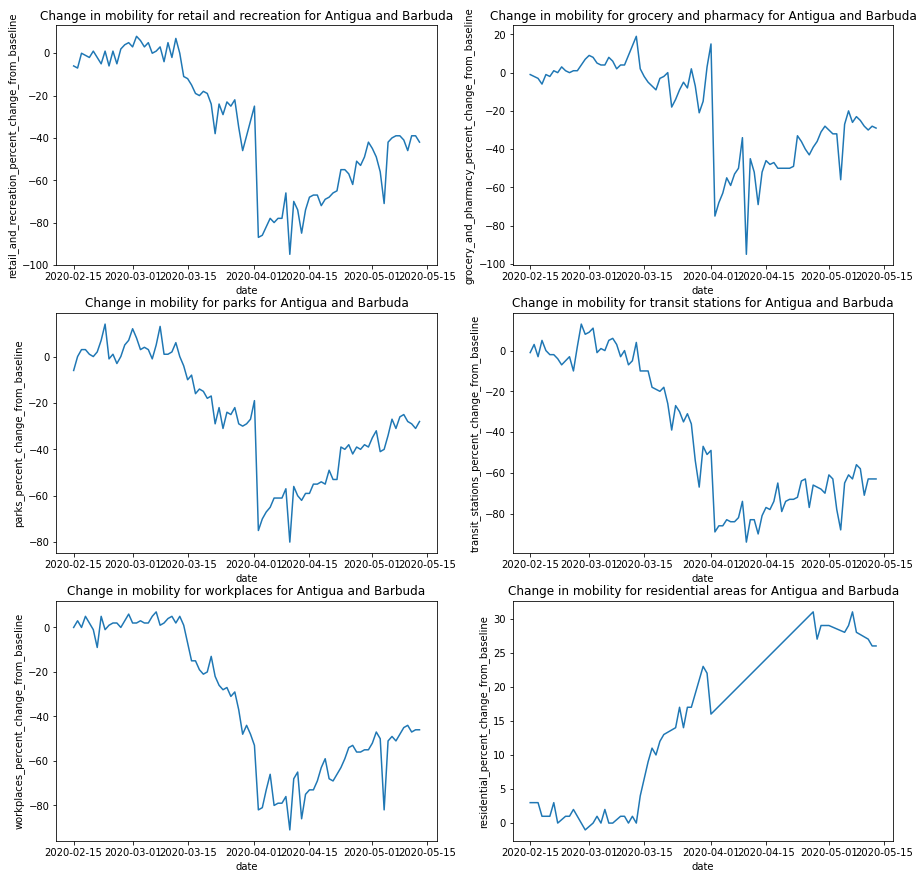

In [12]:
f, axes = plt.subplots(3, 2, figsize = (15, 15))
ax = sb.lineplot(x = 'date', y = "retail_and_recreation_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[0][0])
ax.set_title("Change in mobility for retail and recreation for Antigua and Barbuda")
ax = sb.lineplot(x = 'date', y = "grocery_and_pharmacy_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[0][1])
ax.set_title("Change in mobility for grocery and pharmacy for Antigua and Barbuda")
ax = sb.lineplot(x = 'date', y = "parks_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[1][0])
ax.set_title("Change in mobility for parks for Antigua and Barbuda")
ax = sb.lineplot(x = 'date', y = "transit_stations_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[1][1])
ax.set_title("Change in mobility for transit stations for Antigua and Barbuda")
ax = sb.lineplot(x = 'date', y = "workplaces_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[2][0])
ax.set_title("Change in mobility for workplaces for Antigua and Barbuda")
ax = sb.lineplot(x = 'date', y = "residential_percent_change_from_baseline", data = AG, legend = 'full', ax = axes[2][1])
ax.set_title("Change in mobility for residential areas for Antigua and Barbuda")


"Antigua & Bermuda: Government announces seven-day lockdown from April 2"
Source: https://www.garda.com/crisis24/news-alerts/328036/antigua-bermuda-government-announces-seven-day-lockdown-from-april-2-update-1

## SG

In [13]:
SG = grouped.get_group("SG")

In [14]:
SG

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
101900,SG,Singapore,NaN,NaN,2020-02-15,-14.0,-9.0,-10.0,-17.0,-4.0,8.0
101901,SG,Singapore,NaN,NaN,2020-02-16,-19.0,-17.0,-18.0,-22.0,-7.0,8.0
101902,SG,Singapore,NaN,NaN,2020-02-17,-12.0,-6.0,-7.0,-14.0,-4.0,7.0
101903,SG,Singapore,NaN,NaN,2020-02-18,-13.0,-9.0,-7.0,-15.0,-5.0,7.0
101904,SG,Singapore,NaN,NaN,2020-02-19,-14.0,-14.0,-6.0,-15.0,-5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
101984,SG,Singapore,NaN,NaN,2020-05-09,-65.0,-19.0,-68.0,-64.0,-51.0,32.0
101985,SG,Singapore,NaN,NaN,2020-05-10,-65.0,-29.0,-69.0,-67.0,-46.0,27.0
101986,SG,Singapore,NaN,NaN,2020-05-11,-66.0,-23.0,-64.0,-66.0,-66.0,42.0
101987,SG,Singapore,NaN,NaN,2020-05-12,-61.0,-15.0,-59.0,-64.0,-65.0,41.0


Text(0.5, 1.0, 'Change in mobility for residential areas for Singapore')

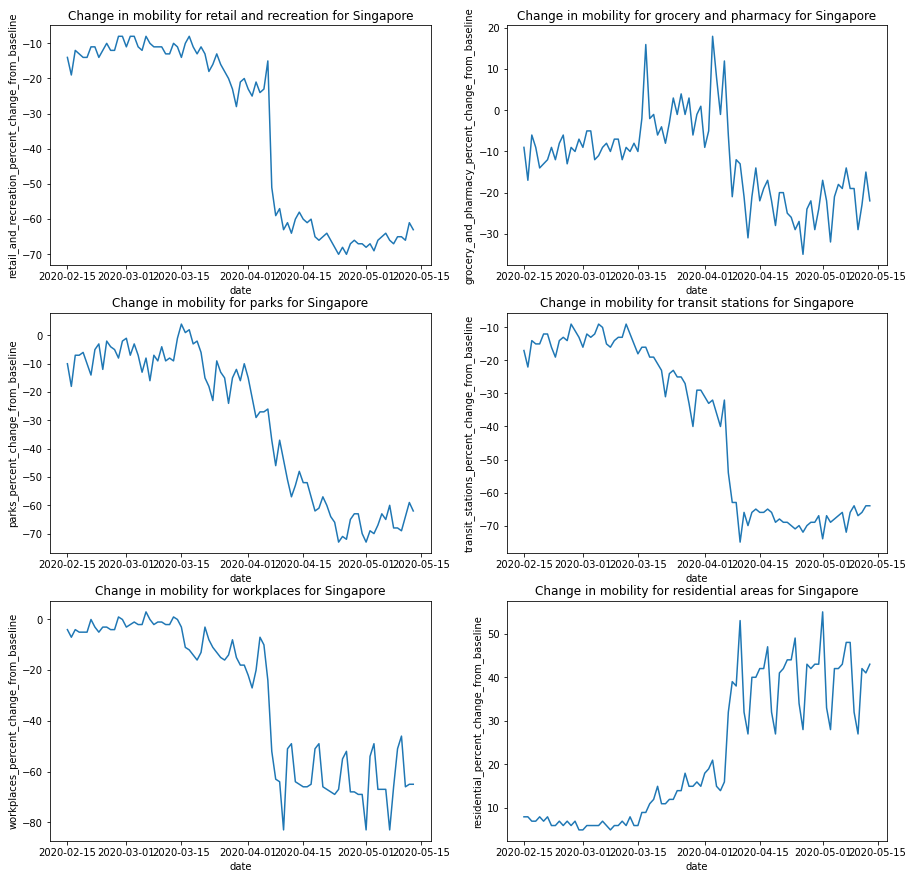

In [15]:
f, axes = plt.subplots(3, 2, figsize = (15, 15))
ax = sb.lineplot(x = 'date', y = "retail_and_recreation_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[0][0])
ax.set_title("Change in mobility for retail and recreation for Singapore")
ax = sb.lineplot(x = 'date', y = "grocery_and_pharmacy_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[0][1])
ax.set_title("Change in mobility for grocery and pharmacy for Singapore")
ax = sb.lineplot(x = 'date', y = "parks_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[1][0])
ax.set_title("Change in mobility for parks for Singapore")
ax = sb.lineplot(x = 'date', y = "transit_stations_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[1][1])
ax.set_title("Change in mobility for transit stations for Singapore")
ax = sb.lineplot(x = 'date', y = "workplaces_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[2][0])
ax.set_title("Change in mobility for workplaces for Singapore")
ax = sb.lineplot(x = 'date', y = "residential_percent_change_from_baseline", data = SG, legend = 'full', ax = axes[2][1])
ax.set_title("Change in mobility for residential areas for Singapore")


For reference, CB started on 7 April, which corroborates strongly with graphs above. 

## Just for reference - No. of subregions_1 and subregions_2

In [19]:
sub_region_1 = pd.DataFrame(mobility_report["sub_region_1"].unique())
sub_region_1

,0
0,NaN
1,Abu Dhabi
2,Ajman
3,Dubai
4,Fujairah
...,...
1203,Limpopo
1204,Mpumalanga
1205,North West
1206,Northern Cape


In [20]:
sub_region_2 = pd.DataFrame(mobility_report["sub_region_2"].unique())
sub_region_2

,0
0,NaN
1,Autauga County
2,Baldwin County
3,Barbour County
4,Bibb County
...,...
1708,Sublette County
1709,Sweetwater County
1710,Uinta County
1711,Washakie County
